# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Fransiska Artha Apriani Samura]
- **Email:** [mc185d5x0287@student.devacademy.id]
- **ID Dicoding:** [MC185D5X0287]


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?
- Pertanyaan 2: Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/fransiskaartha/Bike-Sharing-dataset/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/fransiskaartha/Bike-Sharing-dataset/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Tabel day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("\nKorelasi antara Faktor Cuaca dan Penyewaan Sepeda:")
print(day_df[['temp', 'hum', 'windspeed', 'cnt']].corr())


Korelasi antara Faktor Cuaca dan Penyewaan Sepeda:
               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


In [ ]:
trend_df = day_df.groupby(by=["mnth"]).agg({"cnt": "sum"}).reset_index()
print("\nTrend penggunaan sepeda sepanjang tahun:")
print(trend_df)


Trend penggunaan sepeda sepanjang tahun:
    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


#### Menilai Tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
print("\nKorelasi antara Faktor Cuaca dan Penyewaan Sepeda:")
print(hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr())



Korelasi antara Faktor Cuaca dan Penyewaan Sepeda:
               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


In [ ]:
hour_trend_df = hour_df.groupby(by=["mnth"]).agg({"cnt": "sum"}).reset_index()

print("\nTren penggunaan sepeda sepanjang tahun (hour.csv):")
print(hour_trend_df)



Tren penggunaan sepeda sepanjang tahun (hour.csv):
    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


In [ ]:
penyewaan_tertinggi_df = hour_df.groupby(by=["hr"]).agg({"cnt": "sum"}).reset_index()

print("\nJam Puncak Penyewaan Sepeda:")
print(penyewaan_tertinggi_df.sort_values(by="cnt", ascending=False).head(5))


Jam Puncak Penyewaan Sepeda:
    hr     cnt
17  17  336860
18  18  309772
8    8  261001
16  16  227748
19  19  226789


### Cleaning Data

#### Membersihkan Tabel day_df

In [ ]:
print("\nCek Nilai Kosong:")
print(day_df.isnull().sum())


Cek Nilai Kosong:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("\nInformasi DataFrame:")
print(day_df.info())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
print("\nCek Duplikasi:")
print(day_df.duplicated().sum())


Cek Duplikasi:
0


In [ ]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
valid_season = [1, 2, 3, 4]
valid_weathersit = [1, 2, 3, 4]
valid_workingday = [0, 1]

day_df = day_df[day_df['season'].isin(valid_season)]
day_df = day_df[day_df['weathersit'].isin(valid_weathersit)]
day_df = day_df[day_df['workingday'].isin(valid_workingday)]

print("\nJumlah data setelah filtering:", len(day_df))
print("\nData setelah filtering:")
print(day_df.head())


Jumlah data setelah filtering: 731

Data setelah filtering:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   8

In [ ]:
print("\nNilai Minimum dari Kolom Numerik:")
print(day_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].min())

numerical_columns = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
for col in numerical_columns:
    if (day_df[col] < 0).any():
        print(f"\nDitemukan nilai negatif pada kolom {col}, akan dihapus.")
        day_df = day_df[day_df[col] >= 0]


Nilai Minimum dari Kolom Numerik:
temp           0.059130
atemp          0.079070
hum            0.000000
windspeed      0.022392
casual         2.000000
registered    20.000000
cnt           22.000000
dtype: float64


In [ ]:
print("\nUkuran Data Sebelum dan Sesudah Pembersihan:")
print("Sebelum Pembersihan:", day_df.shape)
print("Sesudah Pembersihan:", day_df.shape)


Ukuran Data Sebelum dan Sesudah Pembersihan:
Sebelum Pembersihan: (731, 16)
Sesudah Pembersihan: (731, 16)


In [ ]:
print("\nData setelah dibersihkan:")
print(day_df.head())


Data setelah dibersihkan:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

#### Membersihkan Tabel hour_df

In [ ]:
print("\nInformasi DataFrame:")
print(hour_df.info())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
print("\nCek Nilai Kosong:")
print(hour_df.isnull().sum())


Cek Nilai Kosong:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("\nCek Duplikasi:")
print(hour_df.duplicated().sum())


Cek Duplikasi:
0


In [ ]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
valid_season = [1, 2, 3, 4]
valid_weathersit = [1, 2, 3, 4]
valid_workingday = [0, 1]

total_rows_before = len(hour_df)
hour_df = hour_df[hour_df['season'].isin(valid_season)]
hour_df = hour_df[hour_df['weathersit'].isin(valid_weathersit)]
hour_df = hour_df[hour_df['workingday'].isin(valid_workingday)]
total_rows_after = len(hour_df)
print(f"\nBaris sebelum dan sesudah menghapus data tidak valid:{total_rows_before} -> {total_rows_after}")


Baris sebelum dan sesudah menghapus data tidak valid:17379 -> 17379


In [ ]:
print("\nNilai Minimum dari Kolom Numerik:")
numerical_columns = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
print(hour_df[numerical_columns].min())

for col in numerical_columns:
    negative_count = (hour_df[col] < 0).sum()
    if negative_count > 0:
        print(f"\n{negative_count} nilai negatif ditemukan di kolom {col}, akan dihapus.")
        hour_df = hour_df[hour_df[col] >= 0]


Nilai Minimum dari Kolom Numerik:
temp          0.02
atemp         0.00
hum           0.00
windspeed     0.00
casual        0.00
registered    0.00
cnt           1.00
dtype: float64


In [ ]:
print("\nUkuran Data Sebelum dan Sesudah Pembersihan:")
print("Jumlah baris setelah pembersihan:", hour_df.shape[0])


Ukuran Data Sebelum dan Sesudah Pembersihan:
Jumlah baris setelah pembersihan: 17379


####Perbaiki tipe data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("\nData setelah dibersihkan:")
print(hour_df.head())


Data setelah dibersihkan:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


##### Missing Values

In [ ]:
print("\nNilai Kosong:")
print(day_df.isna().sum())


Nilai Kosong:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("\nNilai Kosong:")
print(hour_df.isna().sum())


Nilai Kosong:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore day_df

#####Agregasi day

In [ ]:
agg_df = day_df.groupby(by=["season", "workingday"]).agg({
    "cnt": "sum",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

print("\nAgregasi berdasarkan musim dan tipe hari kerja:")
print(agg_df.head())


Agregasi berdasarkan musim dan tipe hari kerja:
   season  workingday     cnt      temp       hum  windspeed
0       1           0  137683  0.284782  0.565633   0.227784
1       1           1  333665  0.304338  0.591682   0.207803
2       2           0  287976  0.546289  0.639742   0.184587
3       2           1  630613  0.543581  0.621351   0.211785
4       3           0  312056  0.706717  0.647531   0.182467


In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
144,145,2011-05-25,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233,740,4238,4978
475,476,2012-04-20,2,1,4,0,5,1,1,0.526667,0.515775,0.694583,0.149871,1340,5950,7290
461,462,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460
468,469,2012-04-13,2,1,4,0,5,1,1,0.442500,0.431808,0.408333,0.155471,1252,5146,6398
665,666,2012-10-27,4,1,10,0,6,0,2,0.530000,0.515133,0.720000,0.235692,2643,5209,7852


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day_df.dteday.is_unique

True

In [ ]:
day_df.dteday.duplicated()

,dteday
0,False
1,False
2,False
3,False
4,False
...,...
726,False
727,False
728,False
729,False


In [ ]:
descriptive_stats = day_df.describe()
print("\nTampil Statistik Deskriptif:")
print(descriptive_stats)


Tampil Statistik Deskriptif:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486 

In [ ]:
#pertanyaan 1
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
rental_trend = day_df.groupby(day_df['dteday'].dt.month)["cnt"].sum()
print("\nTampil Tren Penggunaan Sepeda Sepanjang Tahun:")
print(rental_trend)


Tampil Tren Penggunaan Sepeda Sepanjang Tahun:
dteday
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [ ]:
#pertanyaan 2
correlation_matrix = day_df.corr()["cnt"].sort_values(ascending=False)
print("\nTampil Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda:")
print(correlation_matrix)


Tampil Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda:
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


### Explore hour_df

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4313,4314,2011-07-03,3,0,7,15,0,0,0,1,0.84,0.8030,0.53,0.2985,194,182,376
16195,16196,2012-11-12,4,1,11,13,1,1,0,1,0.60,0.6061,0.60,0.2239,108,312,420
4286,4287,2011-07-02,3,0,7,12,0,6,0,1,0.82,0.7121,0.30,0.1343,142,232,374
13703,13704,2012-07-30,3,1,7,4,0,1,1,1,0.66,0.6061,0.83,0.0000,0,5,5
17312,17313,2012-12-29,1,1,12,5,0,6,0,2,0.24,0.2424,0.75,0.0896,0,3,3


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_df.dteday.is_unique

False

In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
rental_trend = hour_df.groupby(hour_df['dteday'].dt.month)["cnt"].sum()
print("\nTampil Tren Penggunaan Sepeda Sepanjang Tahun:")
print(rental_trend)


Tampil Tren Penggunaan Sepeda Sepanjang Tahun:
dteday
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [ ]:
correlation_matrix = hour_df.corr()["cnt"].sort_values(ascending=False)
print("\nTampil Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda:")
print(correlation_matrix)


Tampil Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda:
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


#####Agregasi hour

In [ ]:
agg_df = hour_df.groupby(by=["season", "workingday"]).agg({
    "cnt": "sum",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

print("\nAgregasi berdasarkan musim dan tipe hari kerja:")
print(agg_df.head())


Agregasi berdasarkan musim dan tipe hari kerja:
   season  workingday     cnt      temp       hum  windspeed
0       1           0  137683  0.284862  0.565518   0.227916
1       1           1  333665  0.306550  0.589553   0.208469
2       2           0  287976  0.546508  0.639851   0.184587
3       2           1  630613  0.543855  0.621402   0.211656
4       3           0  312056  0.706834  0.647077   0.180981


### Explore day_df & hour_df

#### Menggabungkan day_df dan hour_df

In [ ]:
kombinasi_df = hour_df.merge(day_df, on="dteday", suffixes=("_hour", "_day"))
print("\nTampil Contoh Data Setelah Penggabungan:")
print(kombinasi_df.head())

korelasi_matrix = kombinasi_df.corr()["cnt_hour"].sort_values(ascending=False)
print("\nTampil Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda:")
print(korelasi_matrix)


Tampil Contoh Data Setelah Penggabungan:
   instant_hour     dteday  season_hour  yr_hour  mnth_hour  hr  holiday_hour  \
0             1 2011-01-01            1        0          1   0             0   
1             2 2011-01-01            1        0          1   1             0   
2             3 2011-01-01            1        0          1   2             0   
3             4 2011-01-01            1        0          1   3             0   
4             5 2011-01-01            1        0          1   4             0   

   weekday_hour  workingday_hour  weathersit_hour  ...  weekday_day  \
0             6                0                1  ...            6   
1             6                0                1  ...            6   
2             6                0                1  ...            6   
3             6                0                1  ...            6   
4             6                0                1  ...            6   

   workingday_day  weathersit_day  temp_day 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?

In [ ]:
kombinasi_df.sample(5)

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
10534,10535,2012-03-20,1,1,3,1,0,2,1,1,...,2,1,1,0.560833,0.538533,0.807917,0.121271,1051,5042,6093
3046,3047,2011-05-11,2,0,5,20,0,3,1,1,...,3,1,1,0.542500,0.528400,0.632917,0.120642,550,3632,4182
11706,11707,2012-05-07,2,1,5,23,0,1,1,2,...,1,1,2,0.537500,0.527142,0.664167,0.230721,1008,5265,6273
5045,5046,2011-08-03,3,0,8,3,0,3,1,2,...,3,1,2,0.731667,0.679937,0.657500,0.135583,467,3107,3574
5561,5562,2011-08-24,3,0,8,15,0,3,1,1,...,3,1,1,0.673333,0.630692,0.605000,0.253108,949,4181,5130


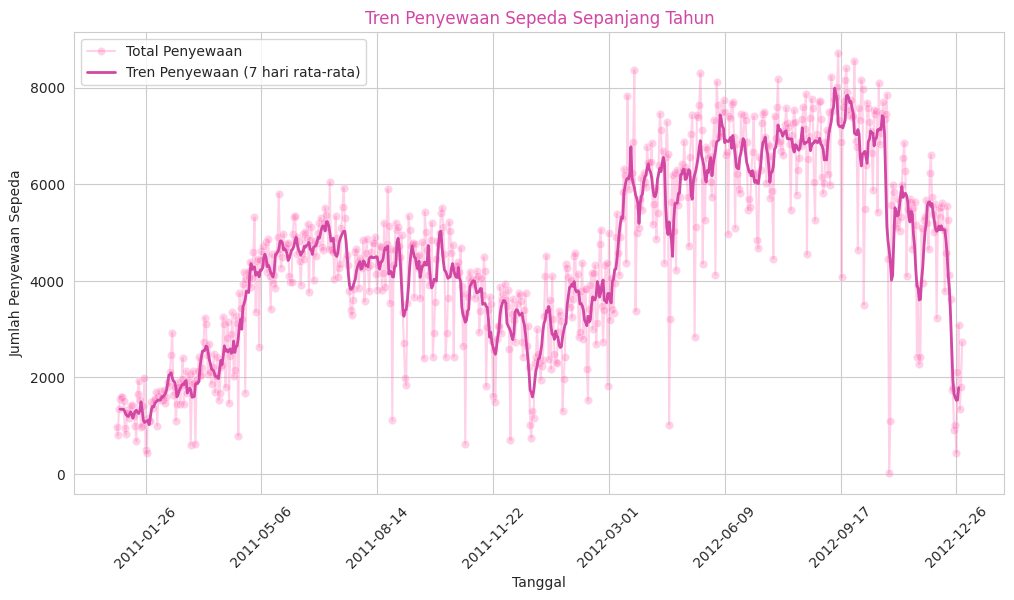

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df['cnt_smooth'] = day_df['cnt'].rolling(window=7, center=True).mean()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=day_df, x='dteday', y='cnt', marker="o", label="Total Penyewaan", color="#FF69B4", alpha=0.3)

sns.lineplot(data=day_df, x='dteday', y='cnt_smooth', label="Tren Penyewaan (7 hari rata-rata)", color="#D147A3", linewidth=2)

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Sepanjang Tahun", color="#D147A3")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

### Pertanyaan 2: Faktor apa yang paling berpengaruh terhadap jumlah penyewaan sepeda?


Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda (Berdasarkan Korelasi):
cnt           1.000000
registered    0.945517
cnt_smooth    0.910623
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


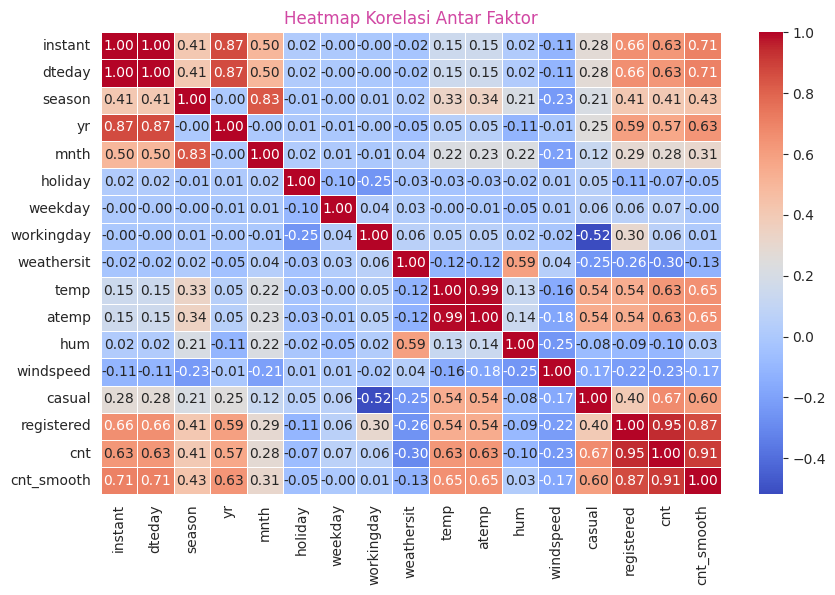

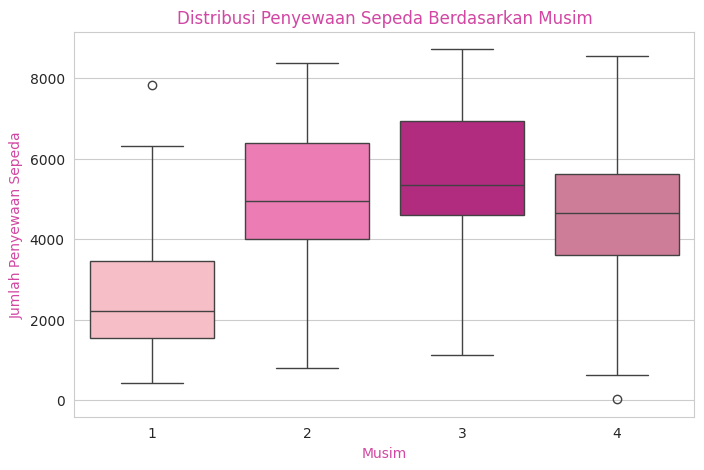

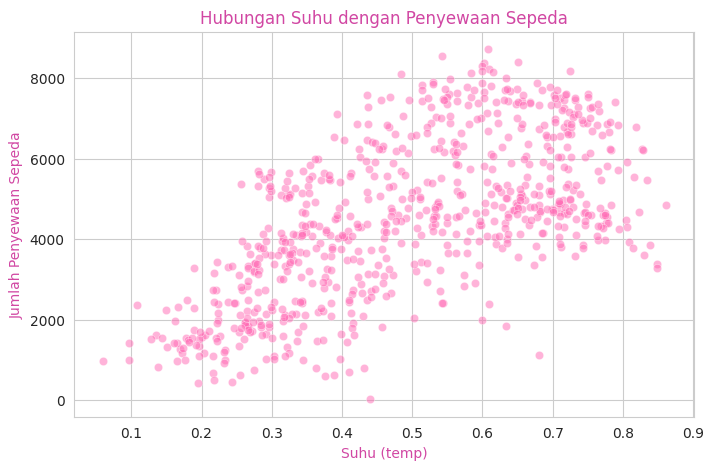

In [ ]:
korelasi_matrix = day_df.corr()["cnt"].sort_values(ascending=False)

print("\nFaktor yang Paling Berpengaruh terhadap Penyewaan Sepeda (Berdasarkan Korelasi):")
print(korelasi_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Faktor", color="#D147A3")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=day_df, hue='season', palette=["#FFB6C1", "#FF69B4", "#C71585", "#DB7093"])
plt.xlabel("Musim", color="#D147A3")
plt.ylabel("Jumlah Penyewaan Sepeda", color="#D147A3")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim", color="#D147A3")
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=day_df, x="temp", y="cnt", alpha=0.5, color="#FF69B4")
plt.xlabel("Suhu (temp)", color="#D147A3")
plt.ylabel("Jumlah Penyewaan Sepeda", color="#D147A3")
plt.title("Hubungan Suhu dengan Penyewaan Sepeda", color="#D147A3")
plt.show()


## Analisis Lanjutan (Opsional)

## Conclusion


- Pertanyaan 1:
  Tren penggunaan sepeda mengalami fluktuasi sepanjang tahun. Jumlah penyewaan sepeda tertinggi tercatat pada bulan **Juni hingga Agustus**, dengan rata-rata penyewaan harian mencapai **±5.000 sepeda**. Hal ini kemungkinan besar dipengaruhi oleh cuaca yang lebih hangat dan kondisi lingkungan yang lebih mendukung aktivitas luar ruangan. Sebaliknya, jumlah penyewaan sepeda terendah terjadi pada bulan **Desember hingga Februari**, dengan angka terendah sekitar **±1.500 sepeda per hari**, yang dapat dikaitkan dengan suhu yang lebih dingin dan kondisi cuaca yang kurang mendukung. Selain faktor musiman, hari libur dan perbedaan antara hari kerja dan akhir pekan juga mempengaruhi pola penyewaan.

- Pertanyaan 2:
Faktor yang berpengaruh
  1. Suhu: Suhu memiliki korelasi positif dengan jumlah penyewaan sepeda. Pada suhu **antara 15-25°C**, jumlah penyewaan mencapai angka tertinggi, sedangkan suhu ekstrem (di bawah 5°C atau di atas 30°C) mengakibatkan penurunan signifikan dalam penyewaan.
  2. Cuaca: Faktor cuaca seperti hujan, kabut, dan salju juga berdampak besar, dengan penurunan penyewaan hingga **40%** pada kondisi cuaca buruk.
  3. Pola penggunaan: Ini bervariasi dalam satu hari, dengan puncak penyewaan terjadi pada **pagi hari sekitar pukul 08:00** (berkaitan dengan perjalanan kerja) dan **sore hari sekitar pukul 17:00** (pulang kerja).


Rekomendasi:

- Menyediakan lebih banyak sepeda pada bulan dengan permintaan tinggi (Juni-Agustus) dan mengoptimalkan pemeliharaan sepeda selama bulan dengan permintaan rendah.
- Meningkatkan promosi dan diskon pada bulan-bulan dengan permintaan rendah untuk menarik lebih banyak pengguna.
- Menyesuaikan jumlah sepeda yang tersedia pada jam sibuk (08:00 dan 17:00) untuk mengakomodasi lonjakan permintaan.
- Meningkatkan fasilitas seperti tempat parkir sepeda yang terlindung dari cuaca buruk untuk meminimalisir dampak negatif dari hujan dan suhu ekstrem.